In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/kimminsung/desktop/heart_2022_no_nans.csv'
data = pd.read_csv(file_path)


In [6]:
data.describe(include='all')

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,246022,246022,246022,246022.000000,246022.000000,246022,246022,246022.000000,246022,246022,...,246022.000000,246022.000000,246022.000000,246022,246022,246022,246022,246022,246022,246022
unique,54,2,5,NaN,NaN,4,2,NaN,4,2,...,NaN,NaN,NaN,2,2,2,2,4,2,3
top,Washington,Female,Very good,NaN,NaN,Within past year (anytime less than 12 months ...,Yes,NaN,None of them,No,...,NaN,NaN,NaN,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,15000,127811,86999,NaN,NaN,198153,191318,NaN,131592,232587,...,NaN,NaN,NaN,135307,161520,131196,146130,81747,235446,167306
mean,NaN,NaN,NaN,4.119026,4.167140,NaN,NaN,7.021331,NaN,NaN,...,1.705150,83.615179,28.668136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.405844,8.102687,NaN,NaN,1.440681,NaN,NaN,...,0.106654,21.323156,6.513973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,...,0.910000,28.120000,12.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,6.000000,NaN,NaN,...,1.630000,68.040000,24.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,7.000000,NaN,NaN,...,1.700000,81.650000,27.460000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,4.000000,NaN,NaN,8.000000,NaN,NaN,...,1.780000,95.250000,31.890000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


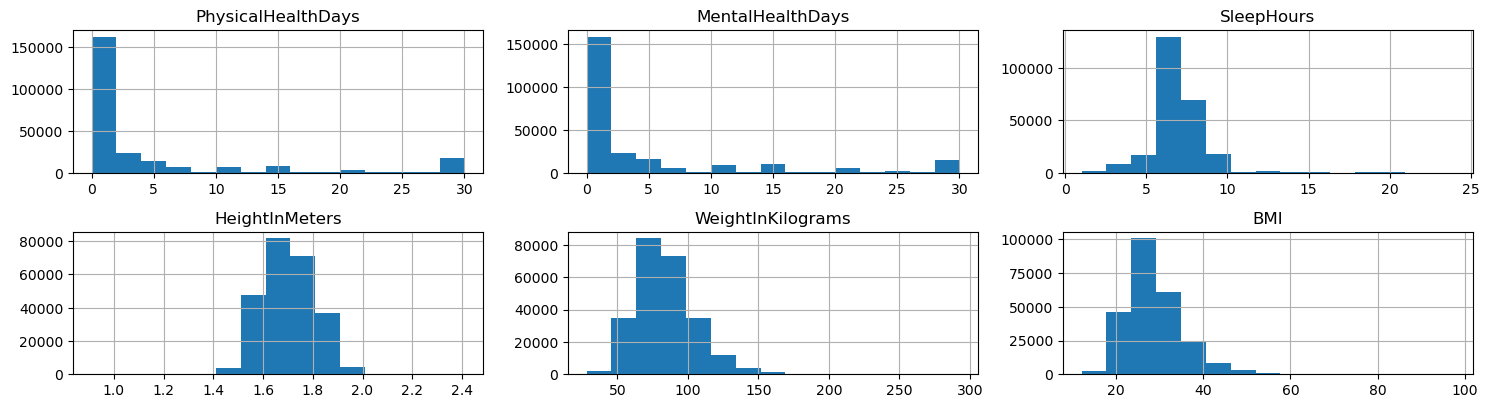

In [19]:
# 수치형 변수 시각화
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.tight_layout()
plt.show()


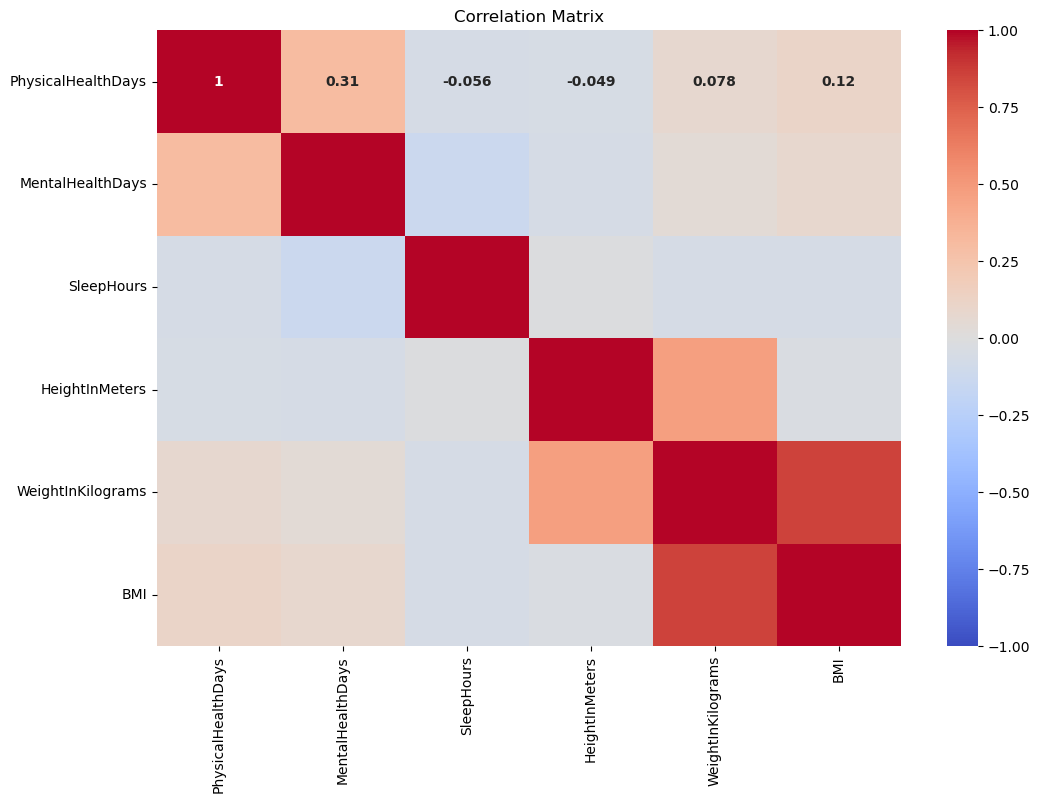

In [23]:
# 수치형 변수 상관관계 히트맵
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10, "weight": "bold"})
plt.title('Correlation Matrix')
plt.show()

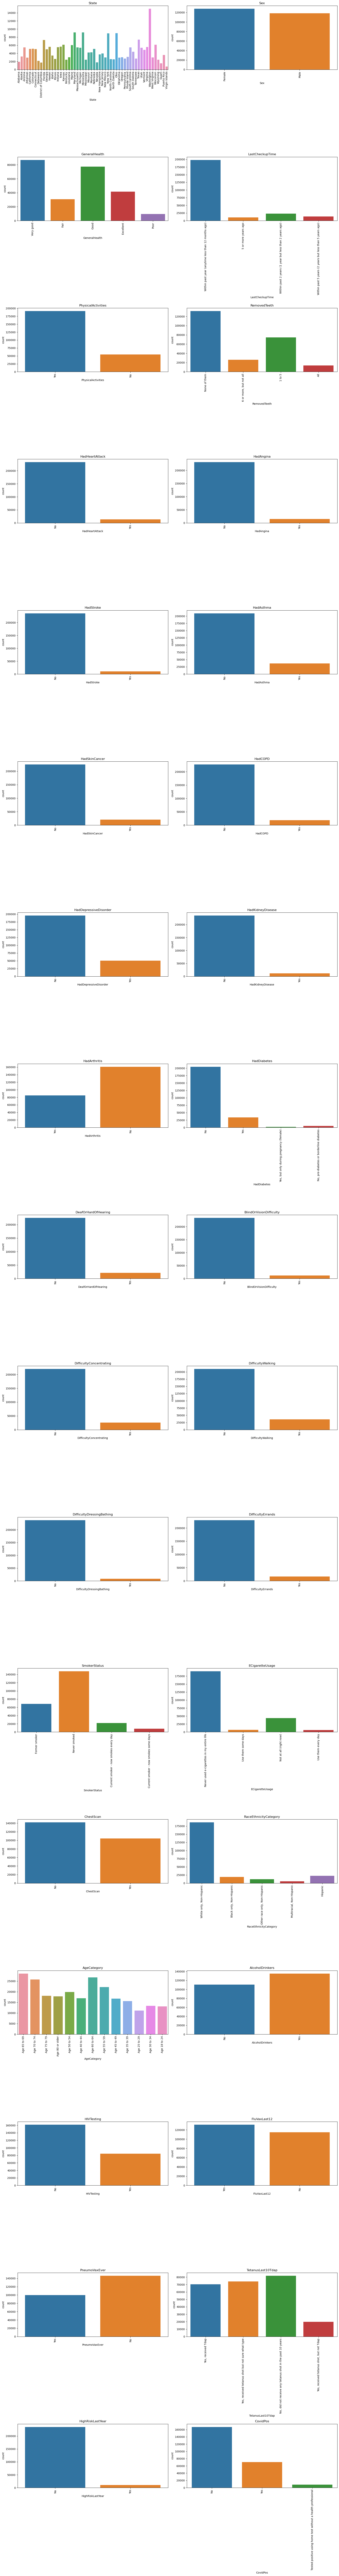

In [17]:
# 범주형 변수 시각화
categorical_columns = data.select_dtypes(include=['object']).columns

fig, axes = plt.subplots((len(categorical_columns) + 1) // 2, 2, figsize=(18, len(categorical_columns) * 4))
axes = axes.flatten()
for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
    axes[i].set_title(column, fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

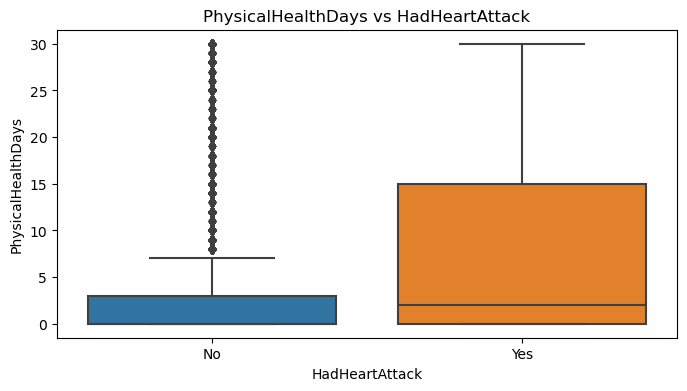

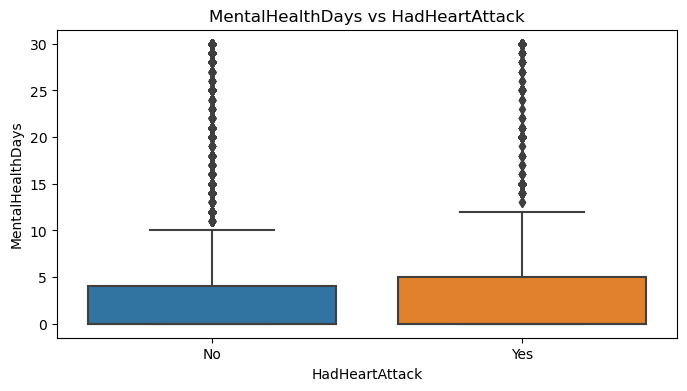

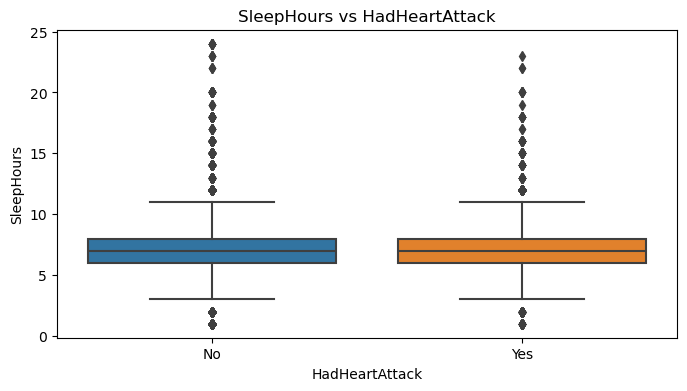

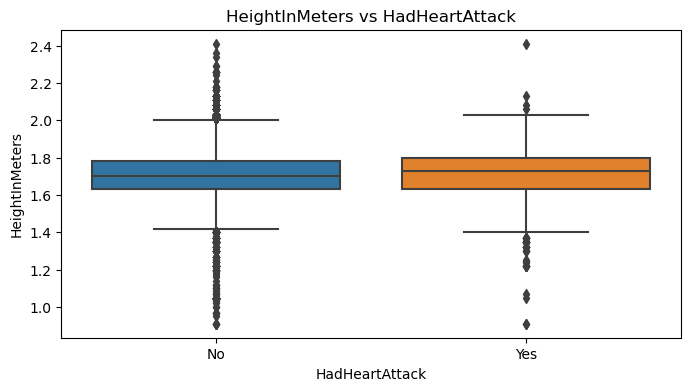

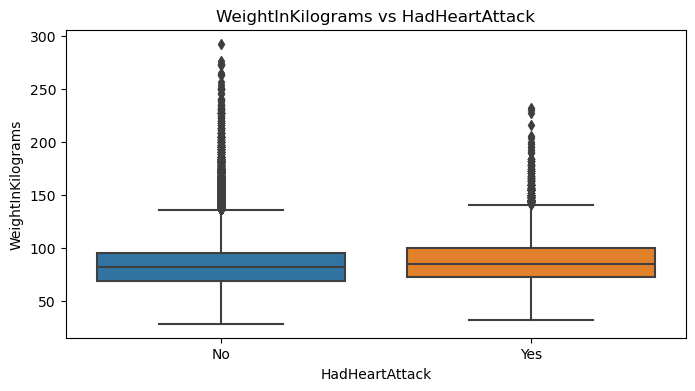

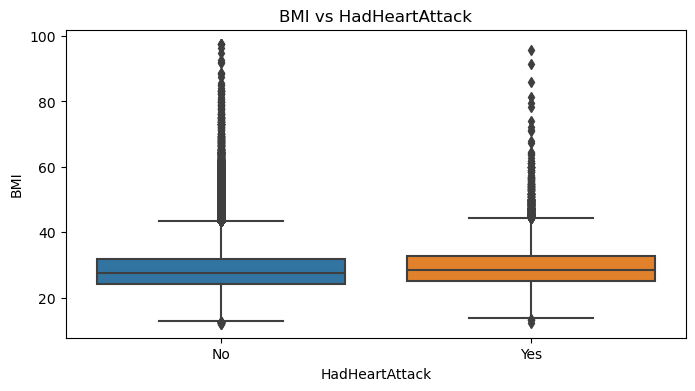

In [21]:
# 심장병 여부에 따른 수치형 변수의 분포
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='HadHeartAttack', y=column)
    plt.title(f'{column} vs HadHeartAttack')
    plt.show()




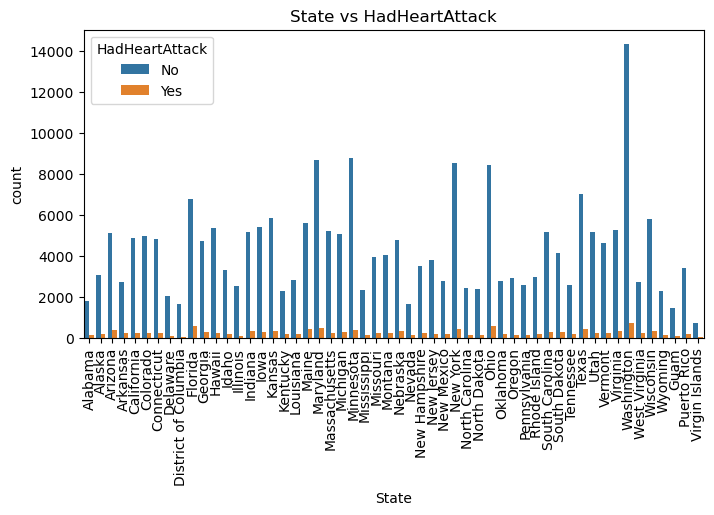

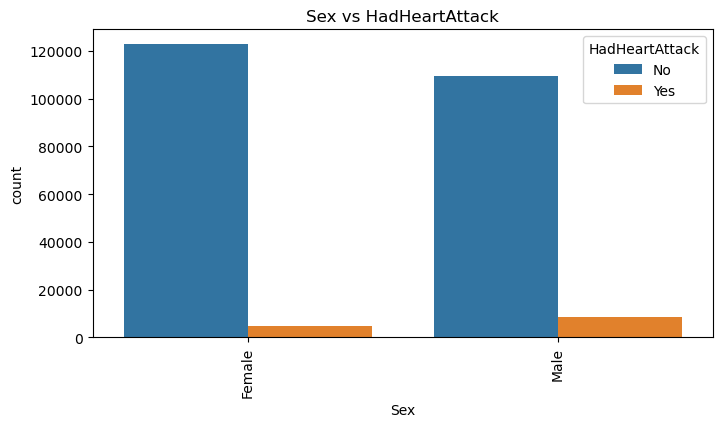

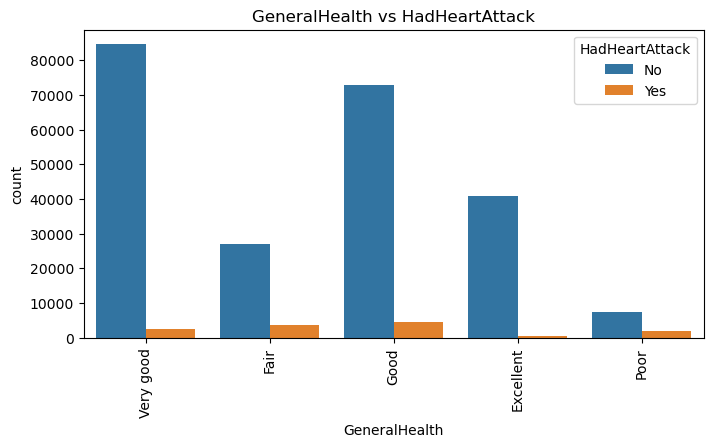

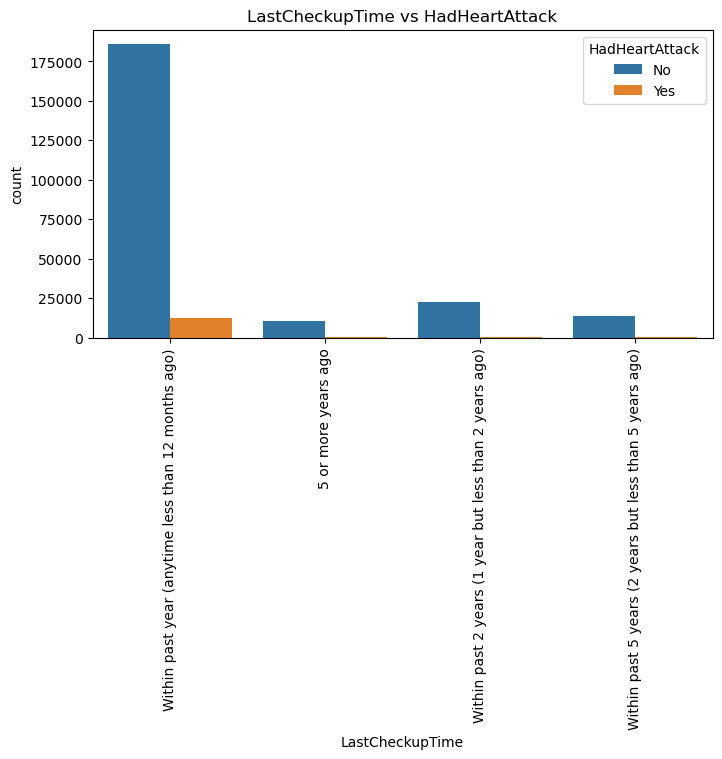

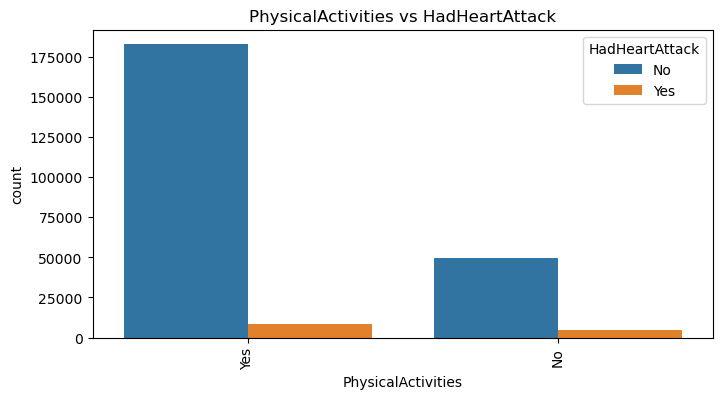

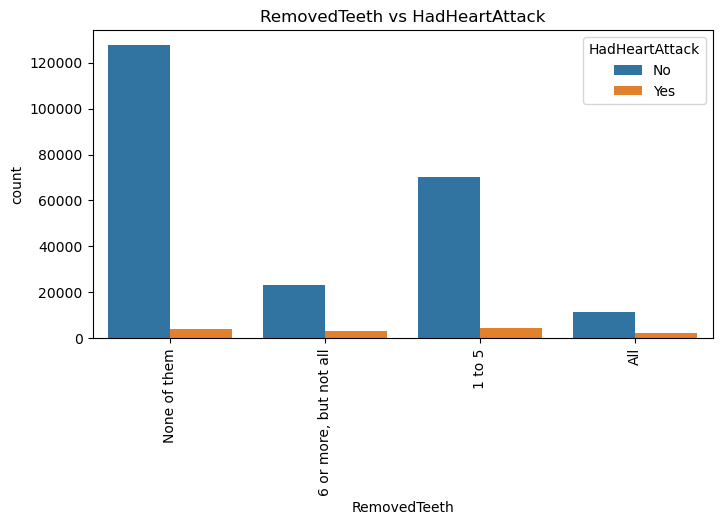

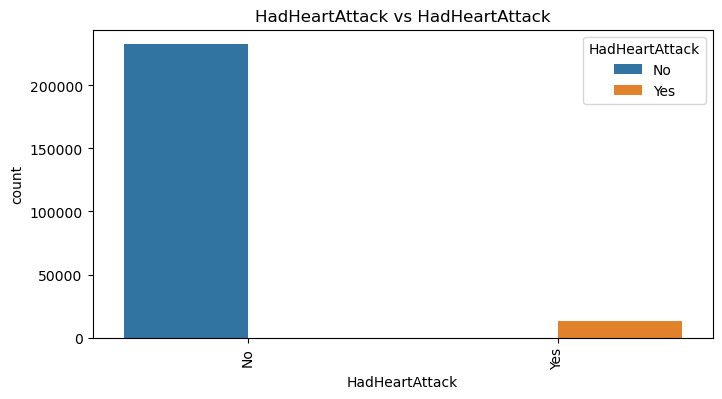

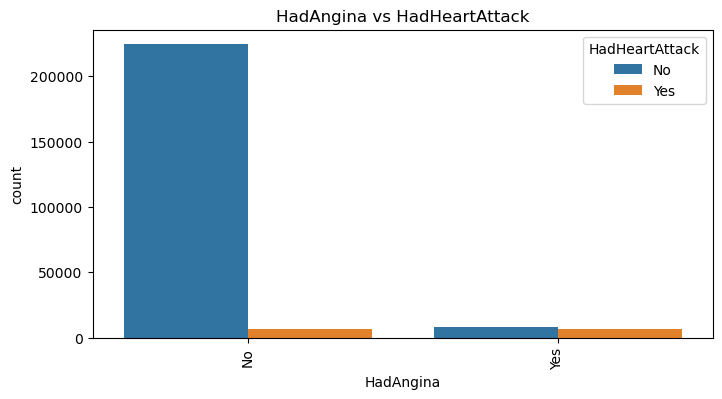

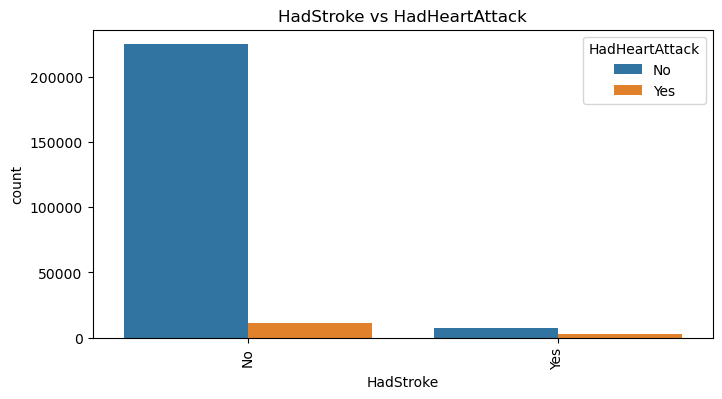

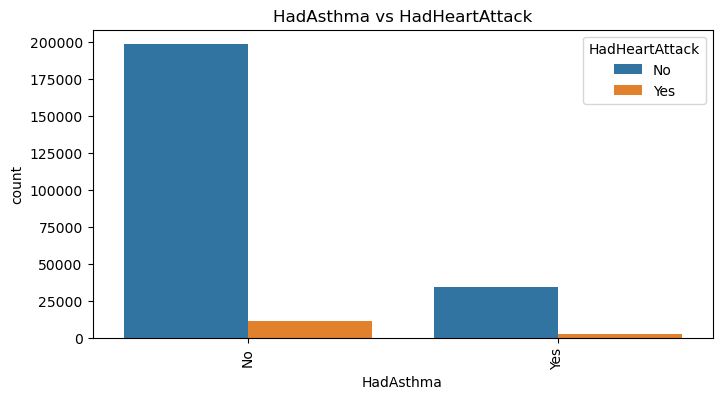

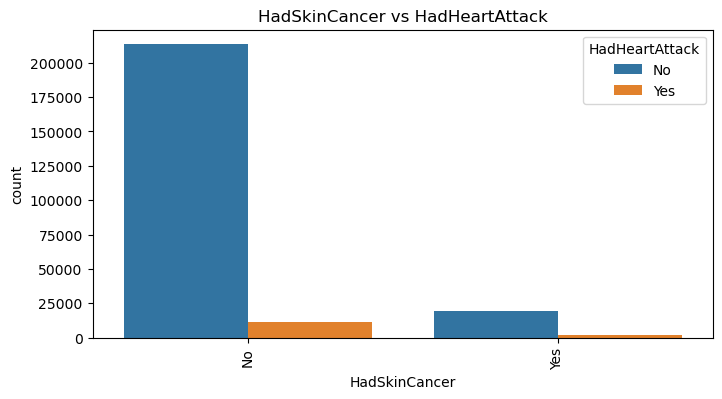

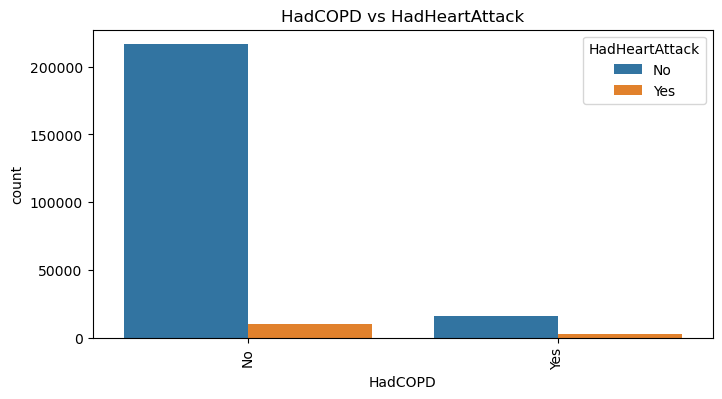

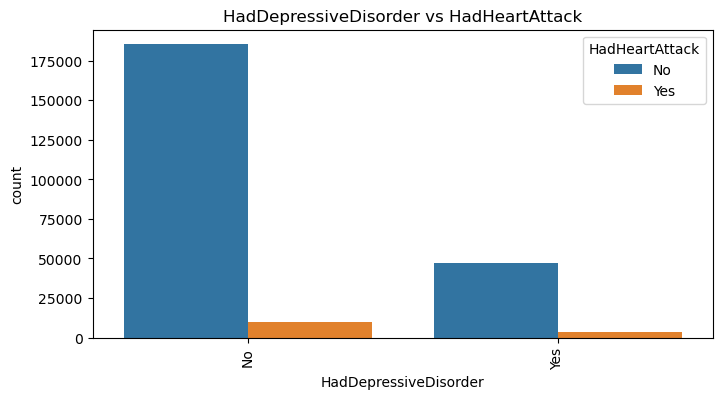

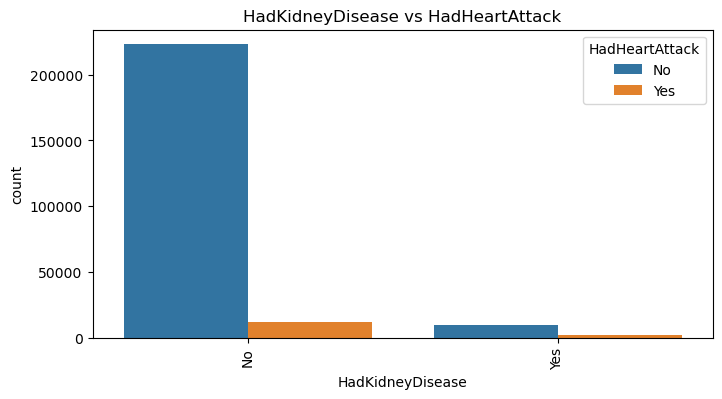

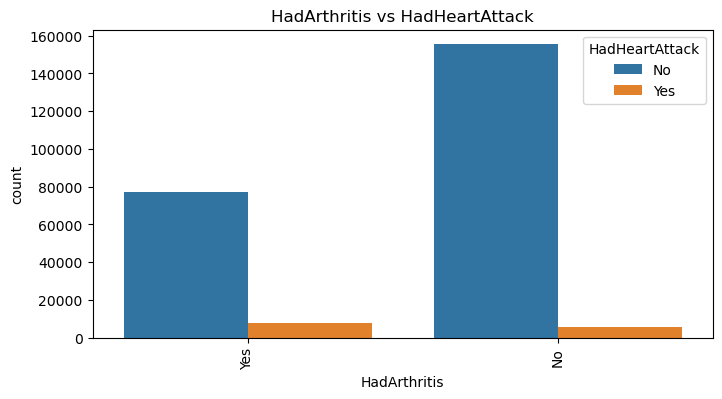

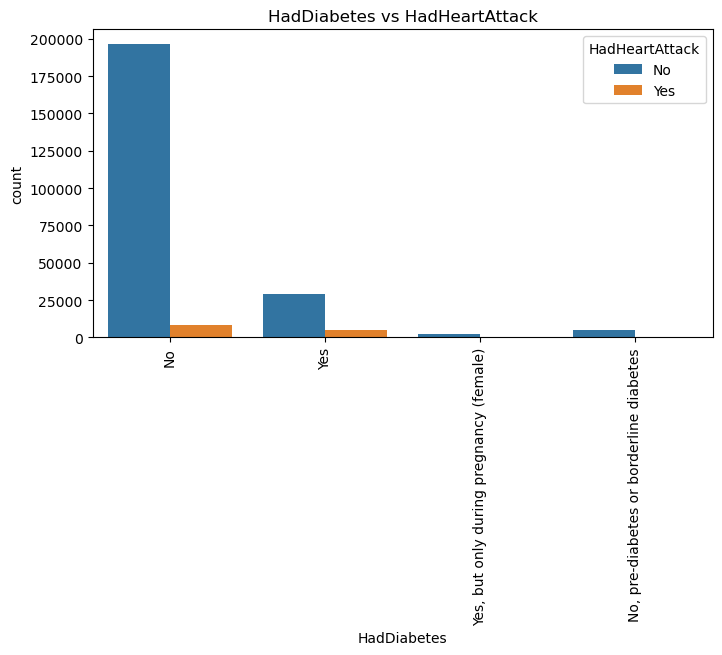

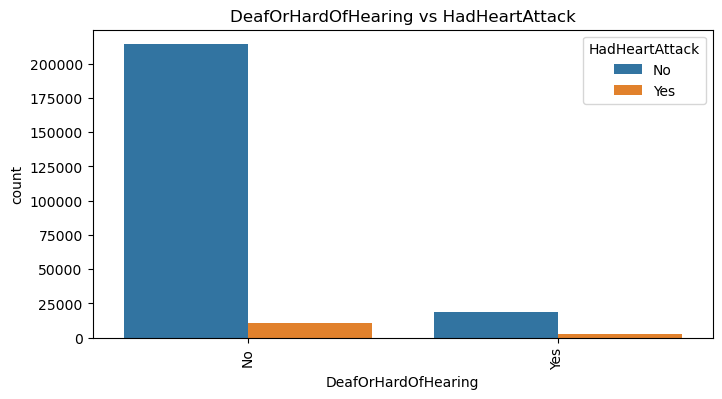

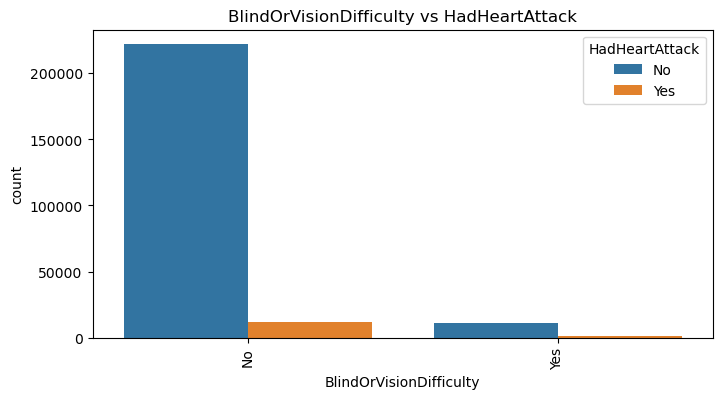

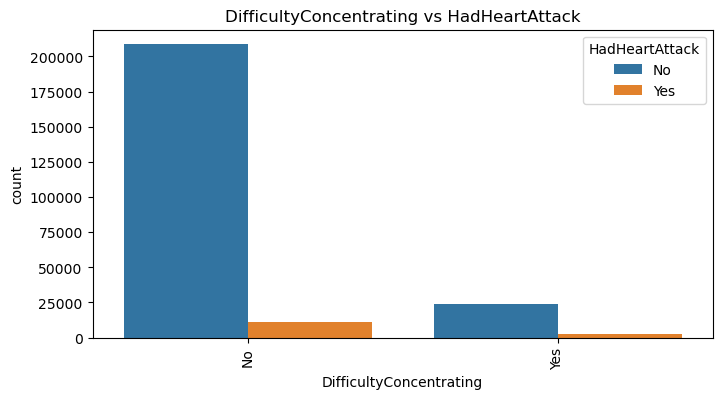

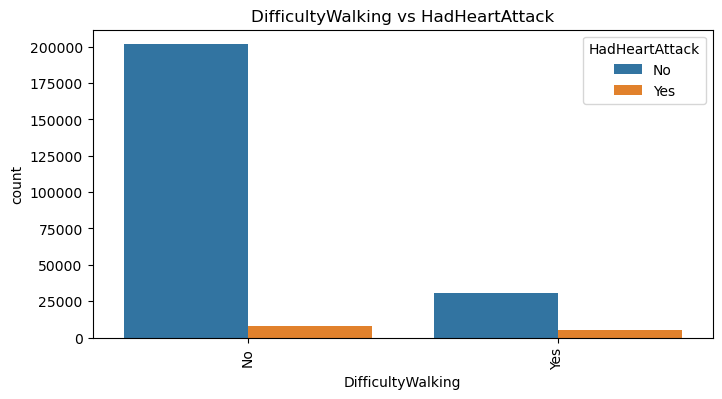

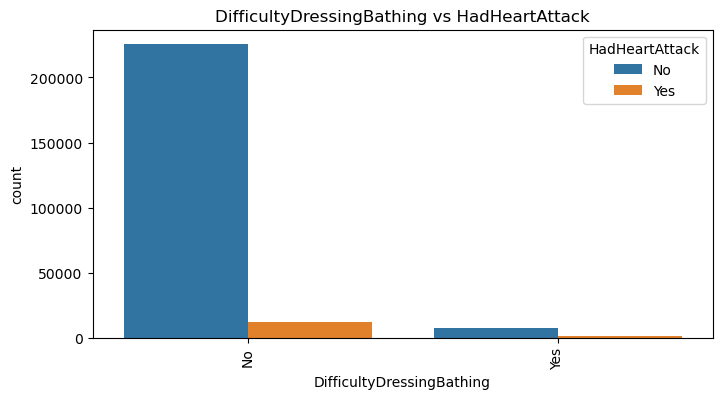

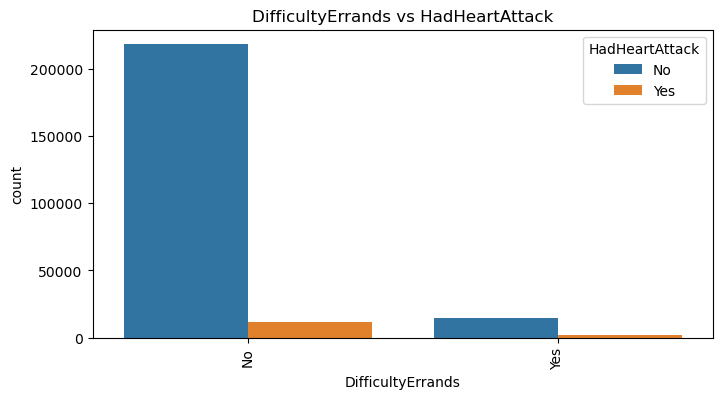

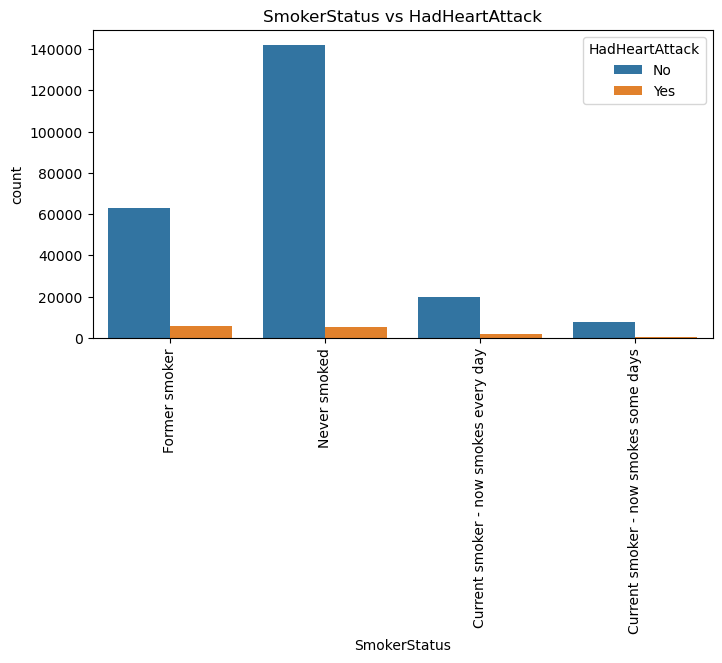

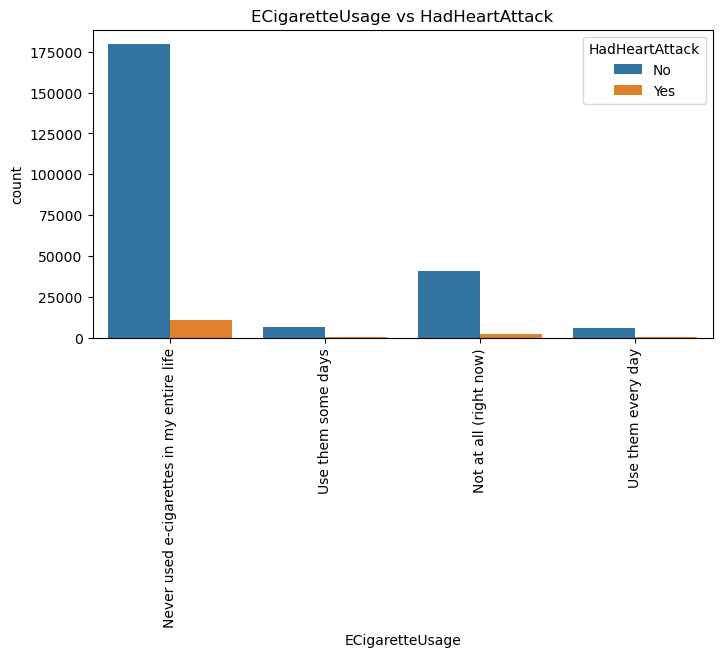

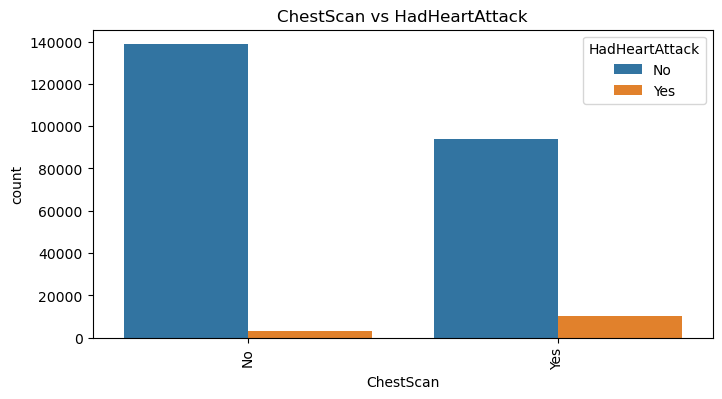

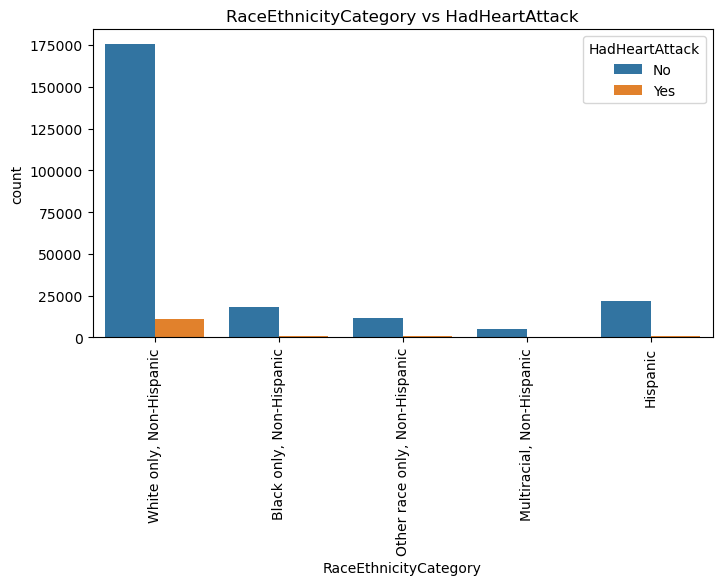

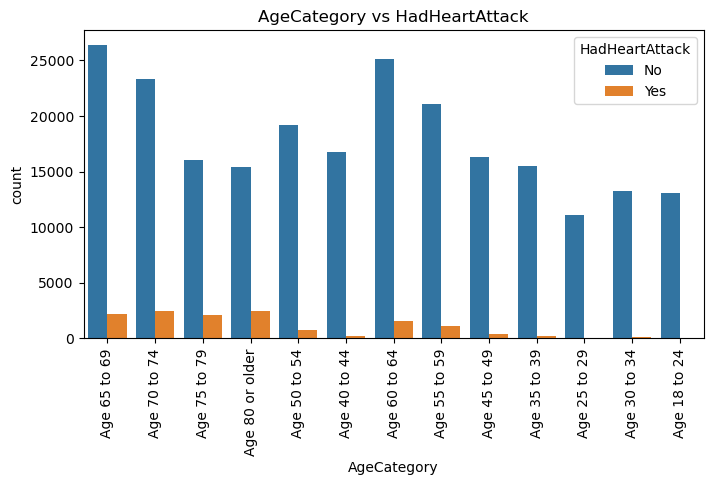

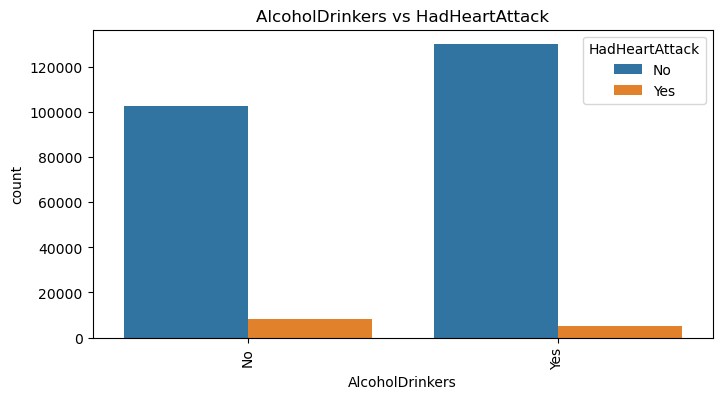

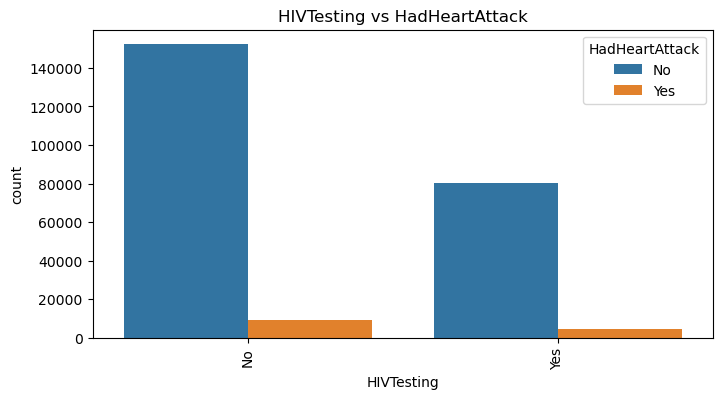

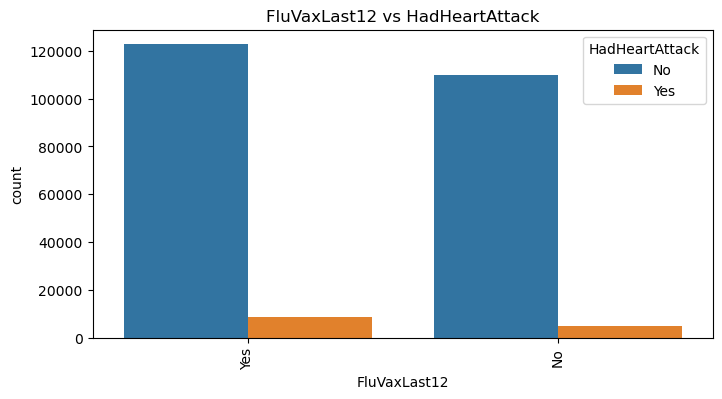

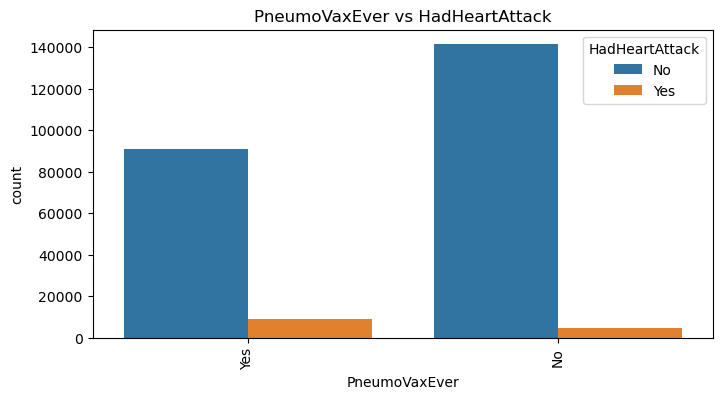

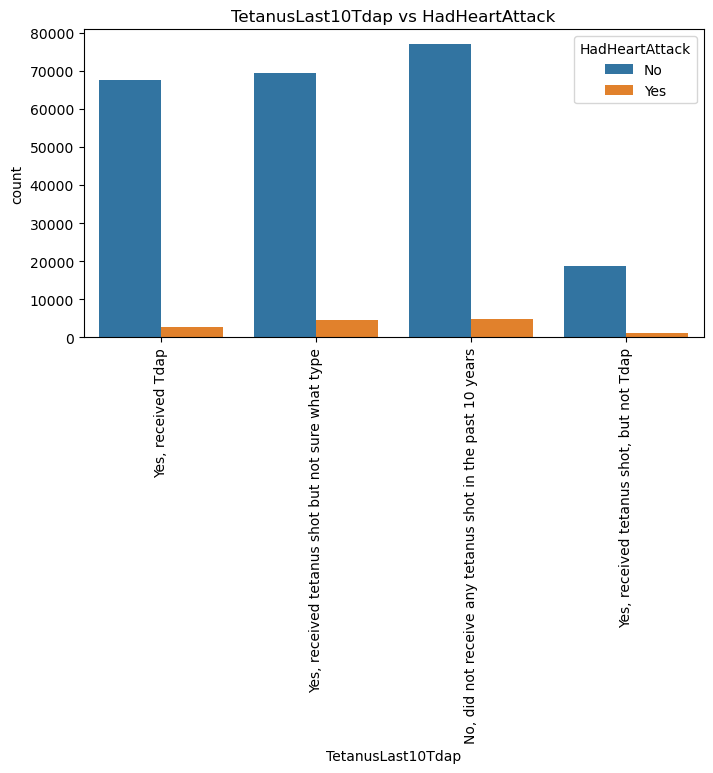

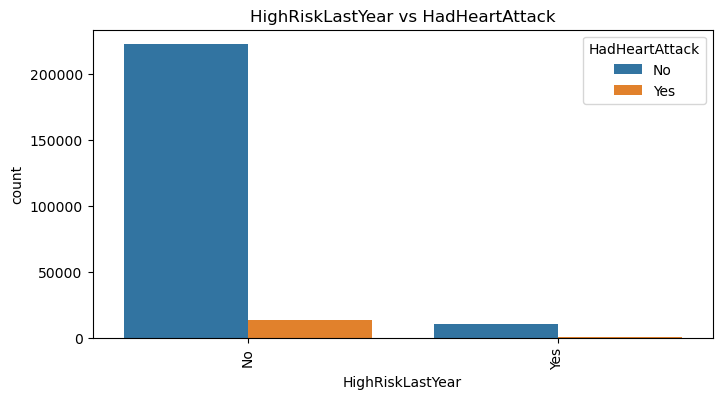

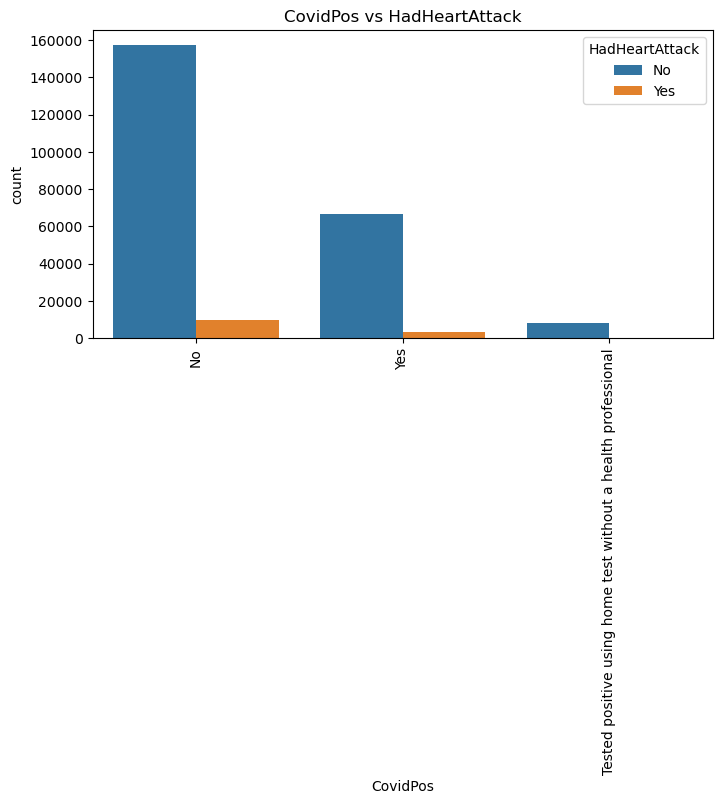

In [22]:
# 심장병 여부에 따른 범주형 변수의 분포
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=column, hue='HadHeartAttack')
    plt.title(f'{column} vs HadHeartAttack')
    plt.xticks(rotation=90)
    plt.show()

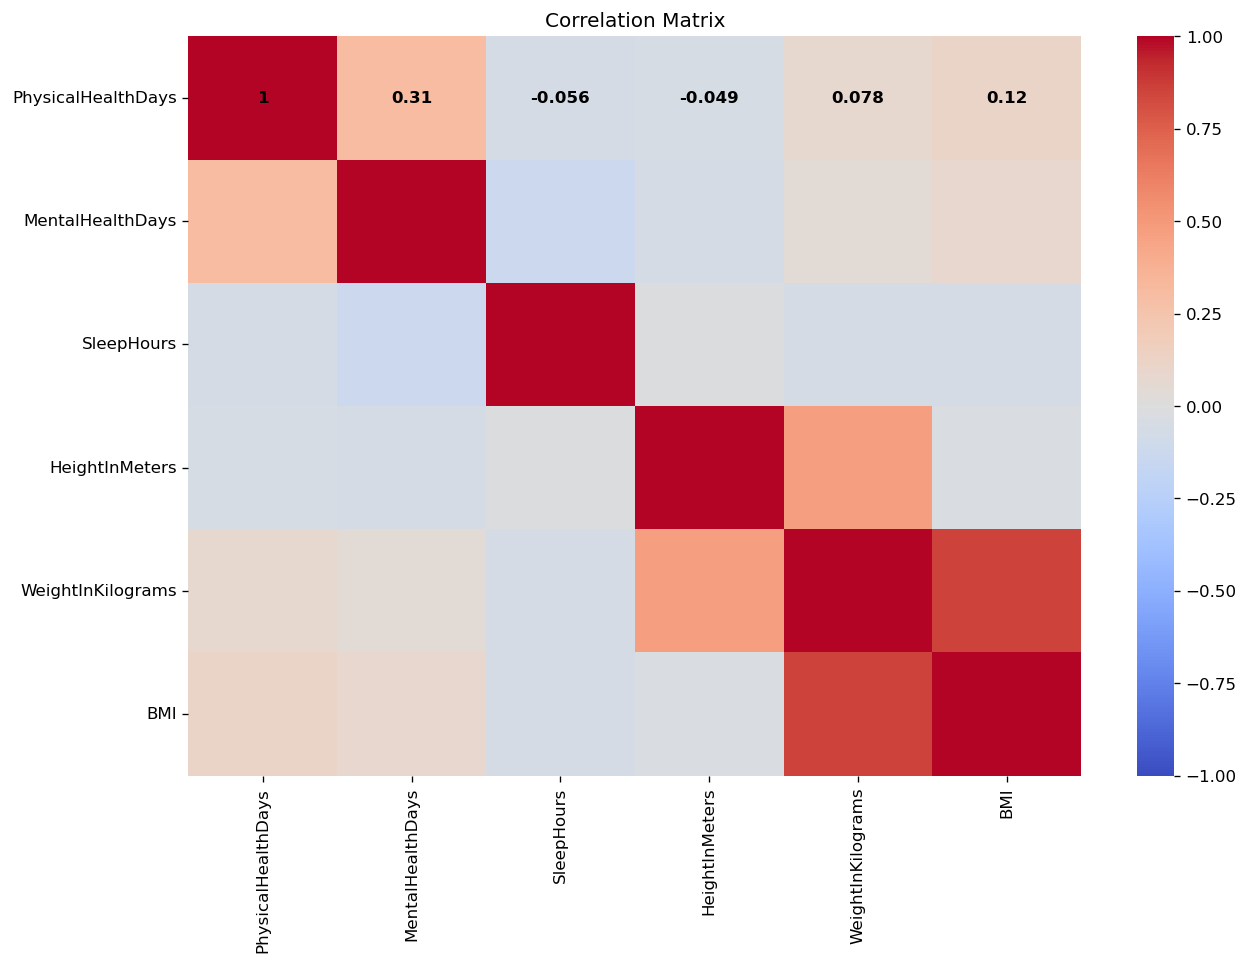

In [24]:
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 8), dpi=120)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10, "weight": "bold", "color": "black"})
plt.title('Correlation Matrix')
plt.show()